## 0.2 Importing libraries and loading HTML page

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [58]:
url='https://en.wikipedia.org/wiki/List_of_largest_German_companies'
page=requests.get(url)
type(page), page

(requests.models.Response, <Response [200]>)

In [59]:
page.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of largest German companies - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-fea

In [62]:
soup=BeautifulSoup(page.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [64]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest German companies - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

In [615]:
type(soup.title), soup.title.text 

(bs4.element.Tag, 'List of largest German companies - Wikipedia')

## 0.3-Loading table

In [71]:
soup.find('table') # returns the first table only, but we need the second table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue<br/><small>(EUR Billions)</small>
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a class="mw-redirect" href="/wiki/Volkswagen_AG" title="Volkswagen AG">Volkswagen</a>
</td>
<td><a href="/wiki/Automotive_industry" title="Automotive industry">Automotive</a>
</td>
<td style="text-align:center;">250.2
</td>
<td><a href="/wiki/Wolfsburg" title="Wolfsburg">Wolfsburg</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Daimler_AG" title="Daimler AG">Daimler AG</a>
</td>
<td><a href="/wiki/Automotive_industry" title="Automotive industry">Automotive</a>
</td>
<td style="text-align:center;">168.0
</td>
<td><a href="/wiki/Stuttgart" title="Stuttgart">Stuttgart</a>
</td></tr>
<tr>
<td>3
</td>
<td><a href="/wiki/Uniper" title="Uniper">Uniper</a>
</td>
<td><a href="/wiki/Electric_utility" title="Electric utility">Electric utility</a>
</td>
<td st

In [72]:
table = soup.find_all('table')[1] # returns 2nd list element - that'the table  we need!
table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Fortune 500<br/>rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue<br/><small>(USD millions)</small>
</th>
<th>Profits<br/><small>(USD millions)</small>
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td>15
</td>
<td><a class="mw-redirect" href="/wiki/Volkswagen_AG" title="Volkswagen AG">Volkswagen</a>
</td>
<td><a href="/wiki/Automotive_industry" title="Automotive industry">Automotive</a>
</td>
<td style="text-align:center;">293,685
</td>
<td style="text-align:center;">15,223
</td>
<td style="text-align:center;">675,805
</td>
<td><a href="/wiki/Wolfsburg" title="Wolfsburg">Wolfsburg</a>
</td></tr>
<tr>
<td>2
</td>
<td>16
</td>
<td><a href="/wiki/Uniper" title="Uniper">Uniper</a>
</td>
<td><a href="/wiki/Electric_utility" title="Electric utility">Electric utility</a>
</td>
<td style="text-align:center;">288,309
</td>
<td style="text-align:center;">−19,961
</td>
<td style

In [76]:
table == soup.find_all('table', class_='wikitable sortable')[1] # list of tables using table class - compare

True

### Table headers

In [86]:
#get table headers
table_headers = table.find_all('th')
print(table_headers)

[<th>Rank
</th>, <th>Fortune 500<br/>rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue<br/><small>(USD millions)</small>
</th>, <th>Profits<br/><small>(USD millions)</small>
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [87]:
table_titles = [title.text for title in tabldf= pd.DataFrame(columns=table_titles) #loading column headers
dfe_headers] # cleaning from HTML tags 
print(table_titles)

['Rank\n', 'Fortune 500rank\n', 'Name\n', 'Industry\n', 'Revenue(USD millions)\n', 'Profits(USD millions)\n', 'Employees\n', 'Headquarters\n']


In [88]:
table_titles = [title.text.strip() for title in table_headers] # cleaning from newline escape sequences 
print(table_titles)

['Rank', 'Fortune 500rank', 'Name', 'Industry', 'Revenue(USD millions)', 'Profits(USD millions)', 'Employees', 'Headquarters']


In [509]:
df= pd.DataFrame(columns=table_titles) #loading column headers
df

,Rank,Fortune 500rank,Name,Industry,Revenue(USD millions),Profits(USD millions),Employees,Headquarters


### Table Data rows

In [91]:
table_rows=table.find_all('tr')
for row in table_rows:
    data_rows = row.find_all('td')
    table_data_row=[title.text.strip() for title in data_rows]
    print(table_data_row)

[]
['1', '15', 'Volkswagen', 'Automotive', '293,685', '15,223', '675,805', 'Wolfsburg']
['2', '16', 'Uniper', 'Electric utility', '288,309', '−19,961', '7,008', 'Düsseldorf']
['3', '47', 'Mercedes-Benz Group', 'Automotive', '157,782', '15,252', '168,797', 'Stuttgart']
['4', '57', 'BMW', 'Automotive', '149,991', '18,870', '149,475', 'Munich']
['5', '67', 'Allianz', 'Insurance', '129,059', '7,087', '159,253', 'Munich']
['6', '73', 'E.ON', 'Electric utility', '121,646', '1,926', '69,378', 'Essen']
['7', '79', 'Deutsche Telekom', 'Telecommunications', '120,108', '8,415', '206,759', 'Bonn']
['8', '103', 'Deutsche Post', 'Transportation', '99,324', '5,636', '554,975', 'Bonn']
['9', '118', 'Robert Bosch GmbH', 'Automotive parts', '91,847', '1,367', '421,338', 'Stuttgart']
['10', '119', 'BASF', 'Chemicals', '91,846', '−660', '111,481', 'Ludwigshafen']
['11', '162', 'Siemens', 'Conglomerate', '77,860', '4,027', '311,000', 'Munich / Berlin']
['12', '170', 'Munich Re', 'Insurance', '75,747', '3,6

In [510]:
df.drop(df.index, inplace=True) # clear the DataFrame, headers remain
# insert the data rows into DataFrame
for row in table_rows[1:]: # skip the first row that is header
    data_rows = row.find_all('td')
    table_data_row=[title.text.strip() for title in data_rows]
    length=len(df) # new row's index in the DataFrame will be equal to DataFrame row count before adding new 
    df.loc[length]=table_data_row
df

,Rank,Fortune 500rank,Name,Industry,Revenue(USD millions),Profits(USD millions),Employees,Headquarters
0,1,15,Volkswagen,Automotive,"293,685","15,223","675,805",Wolfsburg
1,2,16,Uniper,Electric utility,"288,309","−19,961","7,008",Düsseldorf
2,3,47,Mercedes-Benz Group,Automotive,"157,782","15,252","168,797",Stuttgart
3,4,57,BMW,Automotive,"149,991","18,870","149,475",Munich
4,5,67,Allianz,Insurance,"129,059","7,087","159,253",Munich
5,6,73,E.ON,Electric utility,"121,646","1,926","69,378",Essen
6,7,79,Deutsche Telekom,Telecommunications,"120,108","8,415","206,759",Bonn
7,8,103,Deutsche Post,Transportation,"99,324","5,636","554,975",Bonn
8,9,118,Robert Bosch GmbH,Automotive parts,"91,847","1,367","421,338",Stuttgart
9,10,119,BASF,Chemicals,"91,846",−660,"111,481",Ludwigshafen


## 0.4- Data transformation

In [531]:
df.isnull().sum().any(), df.duplicated().any()

(False, False)

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   30 non-null     object
 1   Fortune 500rank        30 non-null     object
 2   Name                   30 non-null     object
 3   Industry               30 non-null     object
 4   Revenue(USD millions)  30 non-null     object
 5   Profits(USD millions)  30 non-null     object
 6   Employees              30 non-null     object
 7   Headquarters           30 non-null     object
dtypes: object(8)
memory usage: 2.1+ KB


In [512]:
# Conversion to integer - Try No. 1
lsNumCols = ['Rank', 'Fortune 500rank', 'Revenue(USD millions)', 'Profits(USD millions)', 'Employees']
df[column] = [df[column].astype('int32') for column in lsNumCols]

ValueError: invalid literal for int() with base 10: '293,685'

In [343]:
# Conversion to integer - Try No. 2 - Remove commas from string numbers
for column in lsNumCols:
    df[column] = df[column].str.replace(',','')
    df[column] = df[column].astype('int32') 

ValueError: invalid literal for int() with base 10: '−19961'

In [515]:
# Conversion to integer - Try No. 3 - Remove commas and Ensure standard minus sign instead of unicode hyphen/minus sign
def MakeProperStrNumSeries(sColumnName):    
    df[sColumnName] = df[sColumnName].astype(str) # convert column to string    
    df[sColumnName] = df[sColumnName].str.replace(',','') # remove comma to be able to convert to number       
    lsItems=df[sColumnName].tolist() #convert Series to list
    lsNum = [] #list of numerical values to append after conversion

    for item in lsItems:
        item = item.strip() #remove leading and trailing blanks if there are any
        if(item[0].isdigit() == False): # if not digit, it has to be minus             
            item=item.replace(item[0],'-') # replace unicode minus/hyphen sign with standard minus sign            
        n=int(item) 
        lsNum.append(item)        
        
    df[sColumnName]=pd.Series(lsNum) 

# Convert string column to numeric column properly
def StrColumnToNumber(sColumnName):
    df['colHelper'] = df[sColumnName] # helper column 
       
    # For negative numbers, ensure there is standard minus sign
    MakeProperStrNumSeries('colHelper')     
    
    df['colHelper'] = df['colHelper'].astype('int32') # convert to integer
    df[sColumnName] = df['colHelper']
    df.drop(columns='colHelper', inplace=True) #remove helper column

In [516]:
#lsNumCols = ['Rank', 'Fortune 500rank', 'Revenue(USD millions)', 'Profits(USD millions)', 'Employees']
# call function in the columm list comprehension
[StrColumnToNumber(column) for column in lsNumCols]

[None, None, None, None, None]

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   30 non-null     int32 
 1   Fortune 500rank        30 non-null     int32 
 2   Name                   30 non-null     object
 3   Industry               30 non-null     object
 4   Revenue(USD millions)  30 non-null     int32 
 5   Profits(USD millions)  30 non-null     int32 
 6   Employees              30 non-null     int32 
 7   Headquarters           30 non-null     object
dtypes: int32(5), object(3)
memory usage: 1.5+ KB


In [519]:
#Convert string columns
lsStrCols = ['Name', 'Industry', 'Headquarters']
for column in lsStrCols:
    df[column] = df[column].astype('string')

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   30 non-null     int32  
 1   Fortune 500rank        30 non-null     int32  
 2   Name                   30 non-null     string 
 3   Industry               30 non-null     string 
 4   Revenue(USD millions)  30 non-null     int32  
 5   Profits(USD millions)  30 non-null     int32  
 6   Employees              30 non-null     int32  
 7   Headquarters           30 non-null     string 
 8   ProfitPerEmployee      30 non-null     float64
dtypes: float64(1), int32(5), string(3)
memory usage: 1.8 KB


In [394]:
df

,Rank,Fortune 500rank,Name,Industry,Revenue(USD millions),Profits(USD millions),Employees,Headquarters
0,1,15,Volkswagen,Automotive,293685,15223,675805,Wolfsburg
1,2,16,Uniper,Electric utility,288309,-19961,7008,Düsseldorf
2,3,47,Mercedes-Benz Group,Automotive,157782,15252,168797,Stuttgart
3,4,57,BMW,Automotive,149991,18870,149475,Munich
4,5,67,Allianz,Insurance,129059,7087,159253,Munich
5,6,73,E.ON,Electric utility,121646,1926,69378,Essen
6,7,79,Deutsche Telekom,Telecommunications,120108,8415,206759,Bonn
7,8,103,Deutsche Post,Transportation,99324,5636,554975,Bonn
8,9,118,Robert Bosch GmbH,Automotive parts,91847,1367,421338,Stuttgart
9,10,119,BASF,Chemicals,91846,-660,111481,Ludwigshafen


## 0.5-Exporting Data

In [117]:
df.to_csv('C:/Users/User/OneDrive/Documents/BLOG/Portfolio/webScrapeExport.csv', encoding='utf-8', index = False)

## 1-Breakdown by industry

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

In [658]:
seriesSum =df.groupby('Industry')['Revenue(USD millions)']
seriesSum = seriesSum.sum()/1000 # show in USD Billions
seriesSum = seriesSum.sort_values(ascending=False).head(5) # sort values Descending and take top 5
dfTop5 = pd.DataFrame(seriesSum)
dfTop5.rename(columns={'Revenue(USD millions)': 'Revenue (USD Billions)'}, inplace=True)
dfTop5

,Revenue (USD Billions)
Industry,
Automotive,655.04
Electric utility,509.21
Insurance,260.83
Automotive parts,179.36
Transportation,158.53


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Automotive'),
  Text(1, 0, 'Electric utility'),
  Text(2, 0, 'Insurance'),
  Text(3, 0, 'Automotive parts'),
  Text(4, 0, 'Transportation')])

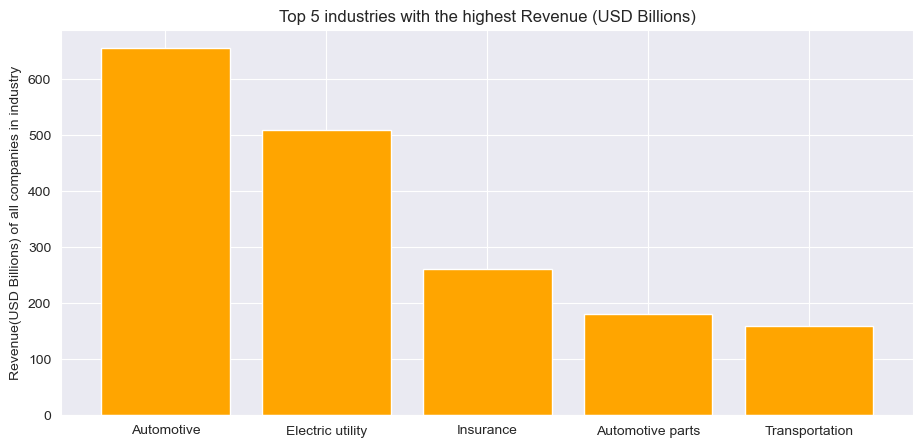

In [577]:
plt.figure(figsize=(11,5))
sns.set_style('darkgrid')
seriesSum.plot.bar(color ='orange', width=0.8)
plt.xlabel("")
plt.ylabel("Revenue(USD Billions) of all companies in industry")
plt.title("Top 5 industries with the highest Revenue (USD Billions)")
plt.xticks(rotation=0)

## 2-Top 10 companies by profit per employee

In [552]:
df['ProfitPerEmployee (USD Thousands)'] = df['Profits(USD millions)'] / df['Employees'] * 1000 # Thousand  USD

In [553]:
df

,Rank,Fortune 500rank,Name,Industry,Revenue(USD millions),Profits(USD millions),Employees,Headquarters,ProfitPerEmployee (USD Thousands)
0,1,15,Volkswagen,Automotive,293685,15223,675805,Wolfsburg,22.53
1,2,16,Uniper,Electric utility,288309,-19961,7008,Düsseldorf,"-2,848.32"
2,3,47,Mercedes-Benz Group,Automotive,157782,15252,168797,Stuttgart,90.36
3,4,57,BMW,Automotive,149991,18870,149475,Munich,126.24
4,5,67,Allianz,Insurance,129059,7087,159253,Munich,44.50
5,6,73,E.ON,Electric utility,121646,1926,69378,Essen,27.76
6,7,79,Deutsche Telekom,Telecommunications,120108,8415,206759,Bonn,40.70
7,8,103,Deutsche Post,Transportation,99324,5636,554975,Bonn,10.16
8,9,118,Robert Bosch GmbH,Automotive parts,91847,1367,421338,Stuttgart,3.24
9,10,119,BASF,Chemicals,91846,-660,111481,Ludwigshafen,-5.92


In [554]:
df.columns

Index(['Rank', 'Fortune 500rank', 'Name', 'Industry', 'Revenue(USD millions)',
       'Profits(USD millions)', 'Employees', 'Headquarters',
       'ProfitPerEmployee (USD Thousands)'],
      dtype='object')

In [639]:
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x)) # format float as 1,000.00
colNames=['Name','ProfitPerEmployee (USD Thousands)','Industry', 'Profits(USD millions)','Fortune 500rank', \
          'Employees', 'Headquarters']
top10_rated=df.nlargest(10,'ProfitPerEmployee (USD Thousands)')[colNames].set_index('Name')
top10_rated['Employees'] = top10_rated['Employees'].apply(lambda x: '{:,}'.format(x)) # format integer as 1,000
top10_rated['Profits(USD millions)'] = \
            top10_rated['Profits(USD millions)'].apply(lambda x: '{:,}'.format(x)) # format integer as 1,000
top10_rated

,ProfitPerEmployee (USD Thousands),Industry,Profits(USD millions),Fortune 500rank,Employees,Headquarters
Name,,,,,,
RWE,156.36,Electric utility,"2,858",367,"18,278",Essen
BMW,126.24,Automotive,"18,870",57,"149,475",Munich
Mercedes-Benz Group,90.36,Automotive,"15,252",47,"168,797",Stuttgart
Munich Re,87.22,Insurance,"3,610",170,"41,389",Munich
EnBW,72.14,Electric utility,"1,828",237,"25,339",Karlsruhe
Deutsche Bank,67.13,Banking,"5,701",354,"84,930",Frankfurt
Talanx,52.09,Insurance,"1,233",249,"23,669",Hanover
Allianz,44.50,Insurance,"7,087",67,"159,253",Munich
Bayer,43.06,Pharmaceuticals,"4,365",265,"101,369",Leverkusen


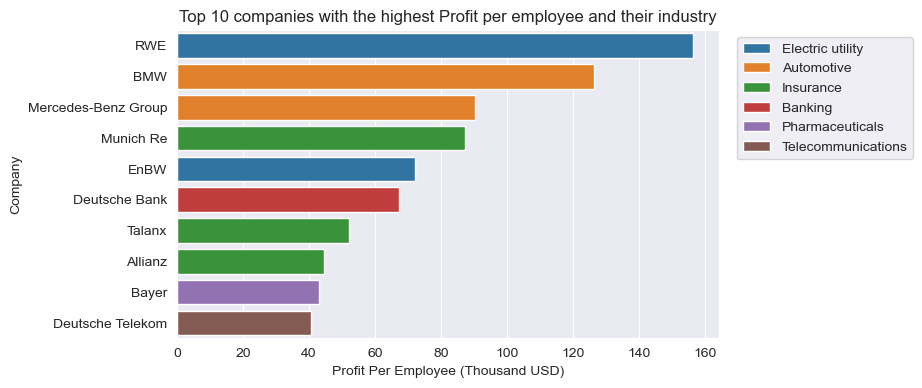

In [603]:
plt.figure(figsize=(7,4))
sns.barplot(x='ProfitPerEmployee (USD Thousands)', y=top10_rated.index, data=top10_rated,hue='Industry', dodge=False)
plt.xlabel("Profit Per Employee (Thousand USD)")
plt.ylabel("Company")
plt.title("Top 10 companies with the highest Profit per employee and their industry")
plt.legend(bbox_to_anchor=(1.02,1),loc=2)

## 3-Breakdown by headquarter

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Munich'),
  Text(1, 0, 'Essen'),
  Text(2, 0, 'Hanover'),
  Text(3, 0, 'Hamburg'),
  Text(4, 0, 'Stuttgart'),
  Text(5, 0, 'Bonn'),
  Text(6, 0, 'Düsseldorf')])

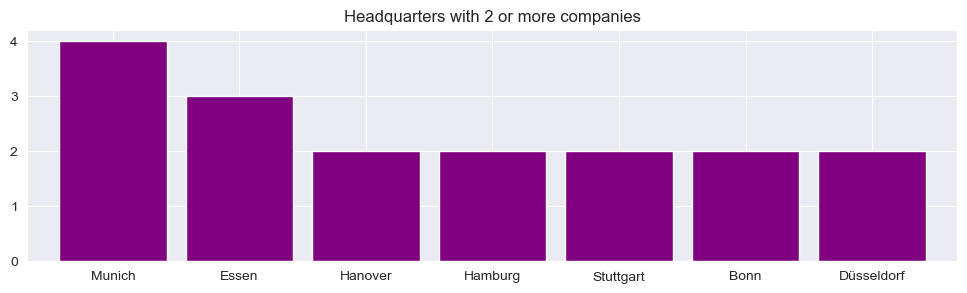

In [581]:
plt.figure(figsize=(12,3))
plt.title('Headquarters with 2 or more companies')

df2 = pd.DataFrame(df['Headquarters'].value_counts() )
series2= df2[df2['Headquarters'] > 1]['Headquarters']
series2.plot.bar(color ='purple', width=0.85) 

plt.xticks(rotation=0)

## 4-Categorization of company size

In [582]:
lsLimits= [0,50000,100000,200000,400000,800000]
lsBinLabels = ['Up to 50,000 Employees', 'From 50,000 to 100,000 Employees', 'From 100,000 to 200,000 Employees',\
               'From 200,000 to 400,000 Employees', 'More than 400,000 Employees']
df['Size']=pd.cut(df['Employees'], lsLimits, labels=lsBinLabels, include_lowest=True)

In [494]:
df

,Rank,Fortune 500rank,Name,Industry,Revenue(USD millions),Profits(USD millions),Employees,Headquarters,RevPerEmployee,ProfitPerEmployee,Size
0,1,15,Volkswagen,Automotive,293685,15223,675805,Wolfsburg,0.434571,22.525729,"More than 400,000 Employees"
1,2,16,Uniper,Electric utility,288309,-19961,7008,Düsseldorf,41.139983,-2848.316210,"Up to 50,000 Employees"
2,3,47,Mercedes-Benz Group,Automotive,157782,15252,168797,Stuttgart,0.934744,90.357056,"From 100,000 to 200,000 Employees"
3,4,57,BMW,Automotive,149991,18870,149475,Munich,1.003452,126.241846,"From 100,000 to 200,000 Employees"
4,5,67,Allianz,Insurance,129059,7087,159253,Munich,0.810402,44.501516,"From 100,000 to 200,000 Employees"
5,6,73,E.ON,Electric utility,121646,1926,69378,Essen,1.753380,27.760962,"From 50,000 to 100,000 Employees"
6,7,79,Deutsche Telekom,Telecommunications,120108,8415,206759,Bonn,0.580908,40.699558,"From 200,000 to 400,000 Employees"
7,8,103,Deutsche Post,Transportation,99324,5636,554975,Bonn,0.178970,10.155412,"More than 400,000 Employees"
8,9,118,Robert Bosch GmbH,Automotive parts,91847,1367,421338,Stuttgart,0.217989,3.244426,"More than 400,000 Employees"
9,10,119,BASF,Chemicals,91846,-660,111481,Ludwigshafen,0.823871,-5.920291,"From 100,000 to 200,000 Employees"


Text(0.5, 1.0, 'Company categories by size (Employee count)')

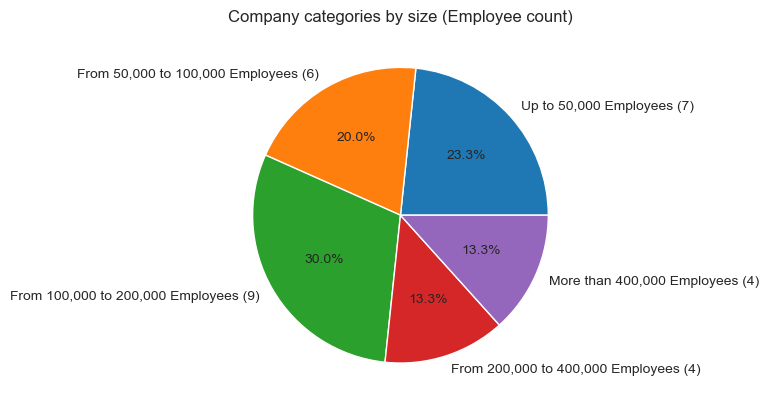

In [584]:
nCatCount=[]
for label in lsBinLabels:
    nCatCount.append(len(df[df['Size'] == label]))
    
lsLabels = []
lenList = len(lsBinLabels) 
for i in range(lenList):       
    lsLabels.append(lsBinLabels[i] + ' (' + str(nCatCount[i]) + ')')

fig, ax = plt.subplots()
ax.pie(nCatCount, labels=lsLabels, autopct='%1.1f%%')
plt.title('Company categories by size (Employee count)')

In [678]:
top10_emp=df.nlargest(10,'Employees')[['Name','Employees', 'Industry']].set_index('Name')
top10_emp_show=top10_emp.copy()
top10_emp_show['Employees'] = top10_emp_show['Employees'].apply(lambda x: '{:,}'.format(x)) # format integer as 1,000
top10_emp_show.rename_axis('Company', inplace=True) # rename index
top10_emp_show[['Employees']]

,Employees
Company,
Volkswagen,"675,805"
Deutsche Post,"554,975"
Robert Bosch GmbH,"421,338"
Edeka Zentrale,"408,900"
Deutsche Bahn,"324,136"
Siemens,"311,000"
Fresenius,"282,024"
Deutsche Telekom,"206,759"
Continental AG,"199,038"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Volkswagen'),
  Text(1, 0, 'Deutsche Post'),
  Text(2, 0, 'Robert Bosch GmbH'),
  Text(3, 0, 'Edeka Zentrale'),
  Text(4, 0, 'Deutsche Bahn'),
  Text(5, 0, 'Siemens'),
  Text(6, 0, 'Fresenius'),
  Text(7, 0, 'Deutsche Telekom'),
  Text(8, 0, 'Continental AG'),
  Text(9, 0, 'Mercedes-Benz Group')])

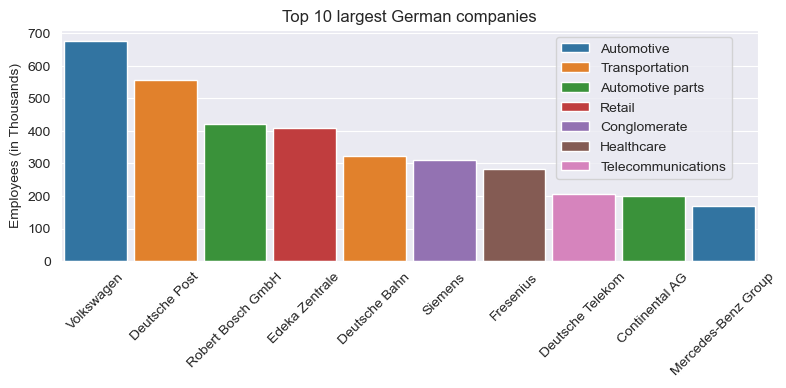

In [676]:
plt.figure(figsize=(9,3))
sns.barplot(y=top10_emp['Employees']/1000, x=top10_emp.index, data=top10_emp, orient='v', hue='Industry', \
            width=0.9, dodge=False)
plt.ylabel("Employees (in Thousands)")
plt.xlabel("")
plt.title("Top 10 largest German companies")
plt.legend(bbox_to_anchor=(0.7,1),loc=2)
plt.xticks(rotation=45)

## 5-Correlation of company size and Fortune 500 Rank

In [629]:
df['F500rank Reversed'] = 500 - df['Fortune 500rank'] # extend DataFrame with reversed Rank column
dfcorr=df.corr(numeric_only =True)
dfcorr

,Rank,Fortune 500rank,Revenue(USD millions),Profits(USD millions),Employees,ProfitPerEmployee (USD Thousands),F500rank Reversed
Rank,1.00,1.00,-0.81,-0.29,-0.40,0.27,-1.00
Fortune 500rank,1.00,1.00,-0.80,-0.28,-0.39,0.27,-1.00
Revenue(USD millions),-0.81,-0.80,1.00,0.11,0.35,-0.56,0.80
Profits(USD millions),-0.29,-0.28,0.11,1.00,0.36,0.69,0.28
Employees,-0.40,-0.39,0.35,0.36,1.00,0.16,0.39
ProfitPerEmployee (USD Thousands),0.27,0.27,-0.56,0.69,0.16,1.00,-0.27
F500rank Reversed,-1.00,-1.00,0.80,0.28,0.39,-0.27,1.00


Text(0.5, 1.0, 'Correlation Heatmap (Pearson method)')

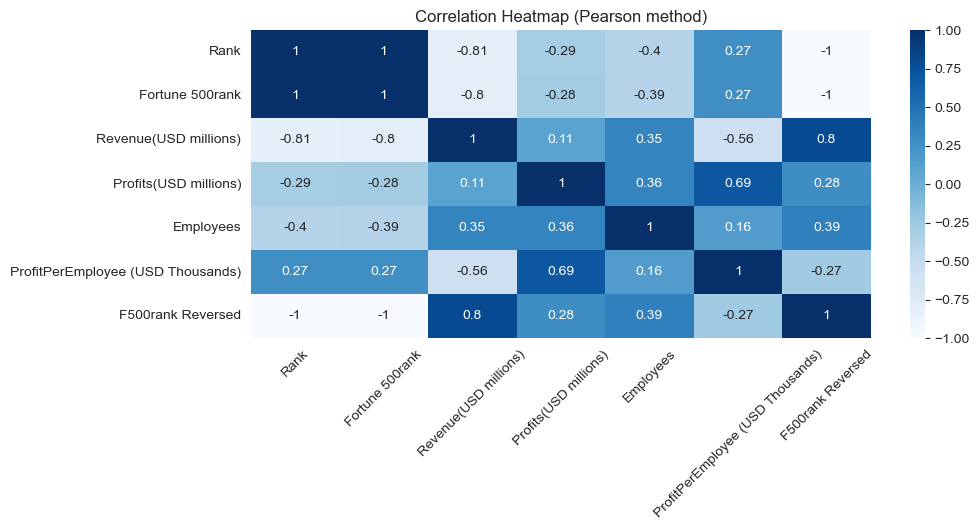

In [633]:
plt.figure(figsize=(10,4))
sns.heatmap(dfcorr, annot=True, cmap="Blues")
plt.xticks(rotation=45)
plt.title('Correlation Heatmap (Pearson method)')

Text(0.5, 1.0, 'Correlation of Company size and Fortune 500 Rank')

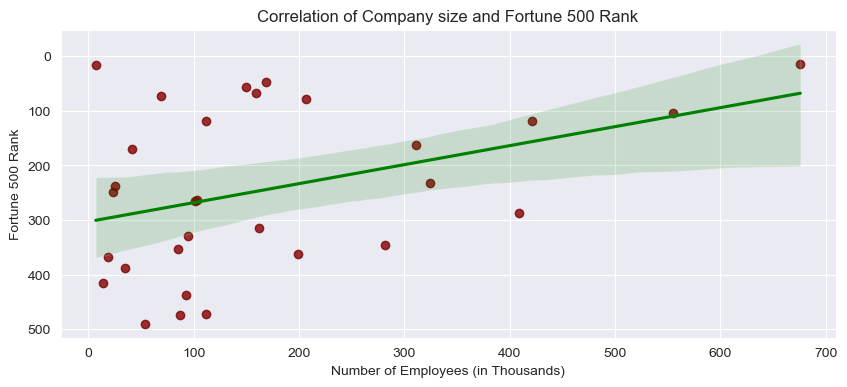

In [636]:
fig = plt.figure(figsize = (10, 4))
#plot scatter graph
sns.set_style("darkgrid")
ax=sns.regplot(x=df['Employees']/1000, y=df['Fortune 500rank'], data=df, scatter_kws={"color": "maroon"}, \
               line_kws={"color": "green"})
ax.invert_yaxis() # Rank values in Reversed order
plt.xlabel('Number of Employees (in Thousands)')
plt.ylabel('Fortune 500 Rank')
plt.title('Correlation of Company size and Fortune 500 Rank')